## Imports

In [16]:
import pandas as pd
from scipy import stats
import seaborn as sns

## Part 1 - Chart a Straight Line

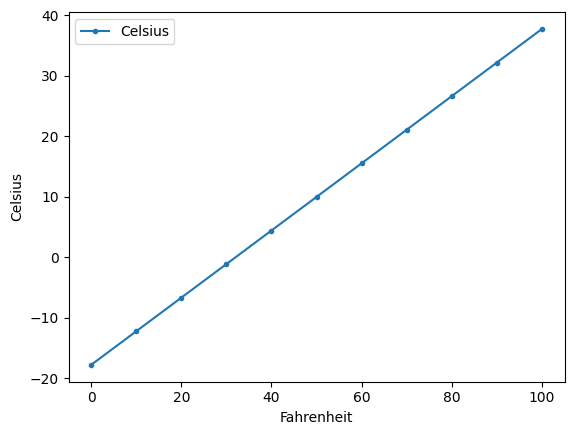

In [17]:
import pandas as pd
import matplotlib

c = lambda f: 5 / 9 * ( f- 32)
temps = [(f ,c(f)) for f in range (0, 101, 10)]

temps_df = pd.DataFrame(temps, columns=["Fahrenheit", "Celsius"])
axes = temps_df.plot(x="Fahrenheit", y="Celsius", style=".-")
y_label = axes.set_ylabel("Celsius")

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [18]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


### Section 2 -Data Inspection

In [19]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [20]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [21]:
nyc_df.columns = ["Date", "Temperature", "Anomaly"]
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [22]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [23]:
linear_regression = stats.linregress(x= nyc_df.Date, y= nyc_df.Temperature)
print(linear_regression.slope)
print(linear_regression.intercept)

0.014771361132966163
8.694993233674289


### Section 6 - Predict

In [24]:
avg_2024 = linear_regression.slope * 2024 + linear_regression.intercept
print(avg_2024)

38.5922281667978


### Section 7 - Visualizations

(10.0, 70.0)

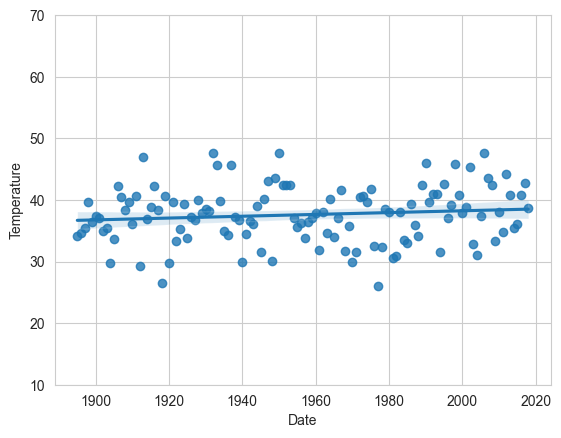

In [26]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10,70)